## Observations and Insights 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [50]:
# Checking the number of mice.
mice = mouse_study["Mouse ID"].nunique()
print(mice)

249


In [51]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_id = mouse_study['Mouse ID']
mouse_times = mouse_study['Timepoint']
mouse_group = pd.DataFrame({"Mouse ID": mouse_id,
                             "Timepoint": mouse_times})
mouse_group


,Mouse ID,Timepoint
0,k403,0
1,k403,5
2,k403,10
3,k403,15
4,k403,20
...,...,...
1888,z969,25
1889,z969,30
1890,z969,35
1891,z969,40


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [52]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = mouse_study.drop_duplicates('Mouse ID')
mouse_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [53]:
# Checking the number of mice in the clean DataFrame.
mice = mouse_clean["Mouse ID"].nunique()
print(mice)

249


## Summary Statistics

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

grouped_df = mouse_study.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_mean = grouped_df['Tumor Volume (mm3)'].mean()

tumor_median = grouped_df['Tumor Volume (mm3)'].median()

tumor_variance = grouped_df['Tumor Volume (mm3)'].var()

tumor_stdev = grouped_df['Tumor Volume (mm3)'].std()

tumor_sem = grouped_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.

drug_summary_df = pd.DataFrame({'Mean': tumor_mean, 
                                   'Median': tumor_median,
                                   'Variance': tumor_variance,
                                   'Standard Deviation': tumor_stdev, 
                                   'SEM': tumor_sem})

drug_summary_df.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [61]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
drug_summary_df.groupby('Drug Regimen').aggregate(['mean', 'median','var','std','sem'])

Mean                            Median                     \
                   mean     median var std sem       mean     median var std   
Drug Regimen                                                                   
Capomulin     40.675741  40.675741 NaN NaN NaN  41.557809  41.557809 NaN NaN   
Ceftamin      52.591172  52.591172 NaN NaN NaN  51.776157  51.776157 NaN NaN   
Infubinol     52.884795  52.884795 NaN NaN NaN  51.820584  51.820584 NaN NaN   
Ketapril      55.235638  55.235638 NaN NaN NaN  53.698743  53.698743 NaN NaN   
Naftisol      54.331565  54.331565 NaN NaN NaN  52.509285  52.509285 NaN NaN   
Placebo       54.033581  54.033581 NaN NaN NaN  52.288934  52.288934 NaN NaN   
Propriva      52.322552  52.322552 NaN NaN NaN  50.854632  50.854632 NaN NaN   
Ramicane      40.216745  40.216745 NaN NaN NaN  40.673236  40.673236 NaN NaN   
Stelasyn      54.233149  54.233149 NaN NaN NaN  52.431737  52.431737 NaN NaN   
Zoniferol     53.236507  53.236507 NaN NaN NaN  51.818479  51.818479 NaN NaN   

                  ... Standard Deviation                             SEM  \
             sem  ...               mean    median var std sem      mean   
Drug Regimen      ...                                                      
Capomulin    NaN  ...           4.994774  4.994774 NaN NaN NaN  0.329346   
Ceftamin     NaN  ...           6.268188  6.268188 NaN NaN NaN  0.469821   
Infubinol    NaN  ...           6.567243  6.567243 NaN NaN NaN  0.492236   
Ketapril     NaN  ...           8.279709  8.279709 NaN NaN NaN  0.603860   
Naftisol     NaN  ...           8.134708  8.134708 NaN NaN NaN  0.596466   
Placebo      NaN  ...           7.821003  7.821003 NaN NaN NaN  0.581331   
Propriva     NaN  ...           6.507770  6.507770 NaN NaN NaN  0.512884   
Ramicane     NaN  ...           4.846308  4.846308 NaN NaN NaN  0.320955   
Stelasyn     NaN  ...           7.710419  7.710419 NaN NaN NaN  0.573111   
Zoniferol    NaN  ...           6.966589  6.966589 NaN NaN NaN  0.516398   

                                    
                median var std sem  
Drug Regimen                        
Capomulin     0.329346 NaN NaN NaN  
Ceftamin      0.469821 NaN NaN NaN  
Infubinol     0.492236 NaN NaN NaN  
Ketapril      0.603860 NaN NaN NaN  
Naftisol      0.596466 NaN NaN NaN  
Placebo       0.581331 NaN NaN NaN  
Propriva      0.512884 NaN NaN NaN  
Ramicane      0.320955 NaN NaN NaN  
Stelasyn      0.573111 NaN NaN NaN  
Zoniferol     0.516398 NaN NaN NaN  

[10 rows x 25 columns]

## Bar and Pie Charts

Text(0.5, 1.0, 'Timepoints Per Regimen')

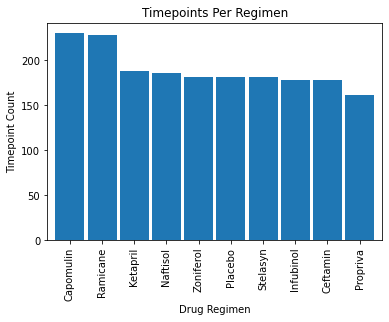

In [69]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_plot = mouse_data_complete['Drug Regimen'].value_counts().plot.bar(width=0.9, zorder=5)


bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Timepoint Count")
bar_plot.set_title("Timepoints Per Regimen")

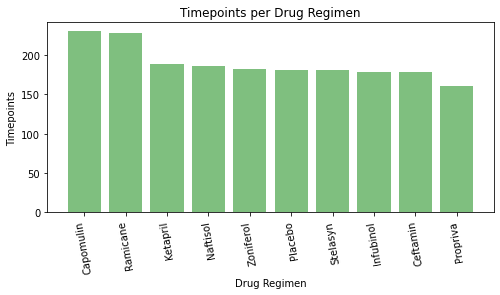

<Figure size 432x288 with 0 Axes>

In [77]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

drug_and_timepoints = mouse_data_complete['Drug Regimen'].value_counts()
plt.figure(figsize=(8,3.5))
plt.bar(drug_and_timepoints.index.values,drug_and_timepoints.values, color='green', alpha=0.5, align="center")
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.xticks(rotation=100)
plt.show()
plt.tight_layout()

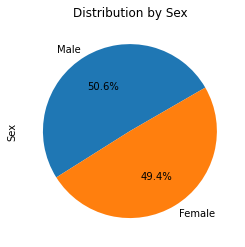

In [79]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

data = mouse_data_complete['Sex'].value_counts()

pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=30, title='Distribution by Sex')

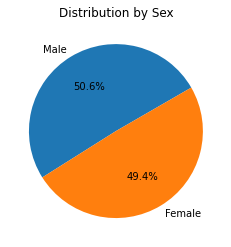

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

data = mouse_data_complete['Sex'].value_counts()

plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=30)
plt.title('Distribution by Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_tumor = mouse_data_complete.groupby(["Mouse ID"])["Timepoint"].max()

greatest_tumor = greatest_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
newly_combined_df = greatest_tumor.merge(mouse_data_complete,on=['Mouse ID','Timepoint'],how="left")

newly_combined_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [90]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumor_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
for treatment in treatments:
        
    last_tumor_volume = newly_combined_df.loc[newly_combined_df["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    
tumor_list.append(last_tumor_volume)

quartiles = last_tumor_volume.quantile([.25,.5,.75])

lowerq = quartiles[0.25]

upperq = quartiles[0.75]

iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)

upper_bound = upperq + (1.5*iqr)

outliers = last_tumor_volume.loc[(last_tumor_volume < lower_bound) | (last_tumor_volume > upper_bound)]

print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
    

The lower quartile of tumor volume is: 48.72207785
The upper quartile of tumor volume is: 64.29983003
The interquartile range of tumor volume is: 15.577752179999997
The the median of tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


ValueError: Dimensions of labels and X must be compatible

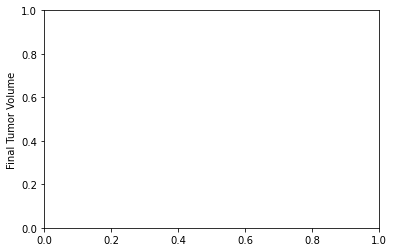

In [95]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('')
ax1.set_ylabel('Final Tumor Volume')
ax1.boxplot(tumor_list, labels = treatments)

plt.show()

## Line and Scatter Plots

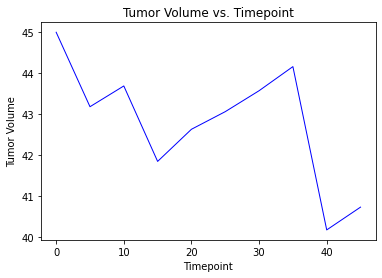

In [99]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_new = mouse_data_complete.loc[mouse_data_complete['Drug Regimen'] == "Capomulin"]

one_mouse_info = capomulin_new.loc[capomulin_new['Mouse ID']=='s710']

plt.plot(one_mouse_info['Timepoint'], one_mouse_info['Tumor Volume (mm3)'], color="blue", linewidth=1)

plt.title("Tumor Volume vs. Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")





plt.show()

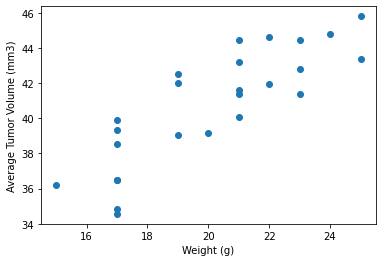

In [100]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_tumor_weight = mouse_data_complete.loc[mouse_data_complete['Drug Regimen'] == "Capomulin"]
capomulin_avg = capomulin_tumor_weight.groupby(['Mouse ID']).mean()

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

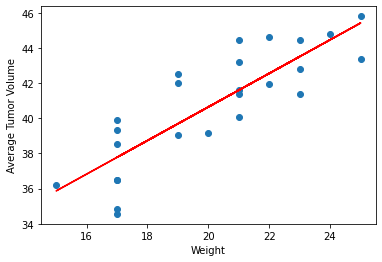

0.84


In [102]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

capomulin_tumor_weight = mouse_data_complete.loc[mouse_data_complete['Drug Regimen'] == "Capomulin"]

capomulin_avg = capomulin_tumor_weight.groupby(['Mouse ID']).mean()

correlation =round(st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])[0],2)

model = st.linregress(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])

y_values = capomulin_avg['Weight (g)']*model[0]+model[1]

plt.scatter(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])

plt.plot(capomulin_avg['Weight (g)'],y_values,"r-")

plt.xlabel('Weight')

plt.ylabel('Average Tumor Volume')
plt.show()
print(correlation)